# **Disaster Tweets Classification using Deep Learning**

## Project Description

In this project, we aim to develop a deep learning-based classification model that can automatically identify whether a tweet is related to a disaster or not. The model will utilize the power of deep learning algorithms to learn the underlying patterns and features from the tweet text. We will use a labeled dataset of disaster and non-disaster tweets for training and testing the model's performance.

## Objective

In this project, we utilize deep learning models to classify whether a tweet related to a disaster or not a disaster. We use open-source libraries like Tensorflow to create and optimize the models using Keras. The entire project is written in **python**.



## Table of Contents

1. Dependencies and Dataset
2. Data Cleaning
3. Data Exploration and Analysis with Cleaned Text
4. Baseline Model
5. Data Preprocessing
6. Training and Tuning Deep learning Models
7. Model Analysis
8. Results
9. Conclusion


## 1. Dependencies and Dataset

### 1.1 Importing dependancies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import re
from collections import Counter
import nltk
from nltk.stem import WordNetLemmatizer,PorterStemmer,LancasterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
import tensorflow as tf
import plotly.graph_objs as plotly
nltk.download('stopwords')
nltk.download('wordnet')
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### 1.2 Loading our dataset

In [ ]:
plt.rcParams.update({'font.size': 14})
# Load train data
data = pd.read_csv("train.csv")
print (data.shape)

(7613, 5)


###  1.3 Understanding the data

We'll train models on the  train [dataset](https://www.kaggle.com/competitions/techexchange-2023-ml-project/data) which has 7613 entries.

* There are 4 shared features: id, keyword, location, text
* There is an predictive feature: target

We are predicting whether a given tweet is about a real disaster or not (two classes). If so, predict a 1 (positive class). If not, predict a 0 (negative class).let's make sure we understand what we're working with.

In [ ]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
# let's take the columns (features) we're interested in.
data = data[["text", "target"]]
data.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


## 2. Data Cleaning


### 2.1 Removing unwanted text using regular expressions

What is lemmatizing?
Lemmatization is the process of grouping together the different inflected forms of a word so they can be analysed as a single item.
Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meaning to one word.

Text preprocessing includes both Stemming as well as Lemmatization. Many times people find these two terms confusing. Some treat these two as same.
Actually, lemmatization is preferred over Stemming because lemmatization does morphological analysis of the words.

Function for cleaning the data, we use RegEx i.e. re python library and WordNetLemmatizer().

In [ ]:
lemmatizer = WordNetLemmatizer()

def clean_data(data):

    #removal of url
    text = re.sub(r'https?://\S+|www\.\S+|http?://\S+',' ',data)

    #decontraction
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)
    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)

    #removal of html tags
    text = re.sub(r'<.*?>',' ',text)

    # Match all digits in the string and replace them by empty string
    text = re.sub(r'[0-9]', '', text)
    text = re.sub("["
                           u"\U0001F600-\U0001F64F"  # removal of emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+",' ',text)

    # filtering out miscellaneous text.
    text = re.sub('[^a-zA-Z]',' ',text)
    text = re.sub(r"\([^()]*\)", "", text)

    # remove mentions
    text = re.sub('@\S+', '', text)

    # remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), '', text)

    # Lowering all the words in text
    text = text.lower()
    text = text.split()

    text = [lemmatizer.lemmatize(words) for words in text if words not in stopwords.words('english')]

    # Removal of words with length<2
    text = [i for i in text if len(i)>=2]
    text = ' '.join(text)
    return text

data["text"] = data["text"].apply(clean_data)

## 3. Data Exploration and Analysis with Cleaned Text

### 3.1 Splitting the data

Split the training data into 90% for training and 10% for validation.


In [ ]:

X = np.array(data['text'])
y = np.array(data['target'])

# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
X_train.shape, X_val.shape

((6851,), (762,))

In [ ]:
#analysing input data
print('First training example label and type:', (X_train[0]), type(X_train[0]))
print('First training example label and type:', (y_train[0]), type(y_train[0]))

First training example label and type: mcfadden reportedly test hamstring thursday via teamstream <class 'str'>
First training example label and type: 0 <class 'numpy.int64'>


### 3.2 Data Visualization

### 3.2.1 Analysing Labels in train data

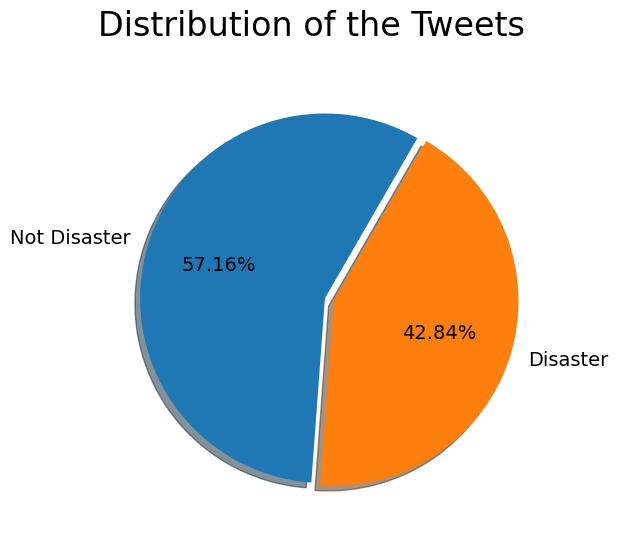

In [ ]:
# Target distribution.
y_train_series = pd.Series(y_train)
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(18, 6), dpi=100)

plt.pie(np.unique(y_train, return_counts=True)[1],
        labels=['Not Disaster', 'Disaster'],
        autopct='%1.2f%%',
        shadow=True,
        explode=(0.05, 0),
        startangle=60,
        textprops={'fontsize': 14})

fig.suptitle('Distribution of the Tweets', fontsize=24)
plt.show()

### 3.2.2 Analyzing Tweet Lengths
Let's find if there is a difference in tweet length between disaster related (pos class) and non-disaster (neg class) realted tweets? A histogram will help answer these questions.

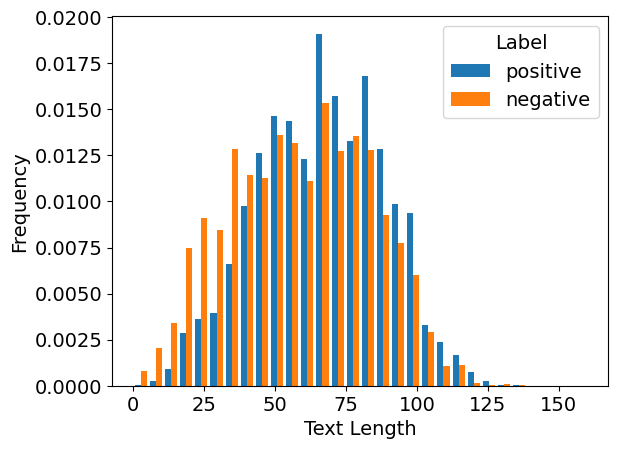

longest Disaster tweet: 137
longest Non disaster tweet: 134


In [ ]:
# Create a list of lengths for training examples with a positive label.
text_lengths_pos = [len(text) for i, text in enumerate(X_train) if y_train[i]]

# And a list of lengths for training examples with a negative label.
text_lengths_neg =[len(text) for i, text in enumerate(X_train) if not y_train[i]]

# The histogram function can take a list of inputs and corresponding labels.
plt.hist([text_lengths_pos, text_lengths_neg], bins=30, range=(0, 160), density=True,
         label=['positive', 'negative'])

plt.xlabel('Text Length')  # x-level
plt.ylabel('Frequency')  # y-level
plt.legend(title='Label')  # Overall legend
plt.show()

# Also check the longest tweets.
print('longest Disaster tweet:', max(text_lengths_pos))
print('longest Non disaster tweet:', max(text_lengths_neg))

### Findings
As we know we need to think of frequency in each class rather than the absolute count of each class. Therefore, we set density=True while plotting histograms which will do per class normalization. Now we have frequencies of each bucket and now its safer to compare pair of bars in this histogram.

From analyzing the length of tweets we observed that the length of tweets in the range of (0-40) are non disastrous and with the increase in the length of tweets it becomes more disastrous.

### 3.2.3 Analyzing Word Clouds

A word cloud is a data visualization technique that displays a collection of words in a way that emphasizes the frequency of occurrence of each word. In a word cloud, the size of each word represents its frequency of occurrence in the given text data.

Here, we can create Word Clouds for both classes.
* Positive Class : related to disaster tweets
* Negative Class : related to non disaster tweets

We aim to identify the commonly used words that are in tweets related to disasters (i.e., positive class) and that are not related to disasters (i.e., negative class)."

In [ ]:
label_texts = {1:'', 0: ''}    # maps all the texts to their classes type (0 or 1)

# iterate over the training data and add text to the corresponding class type
for i, text in enumerate(X_train):
  label_text = text
  if y_train[i] == 1:
    label_texts[1] += label_text
  else:
      label_texts[0] += label_text

Word Cloud for Disaster related tweets (Positive class)


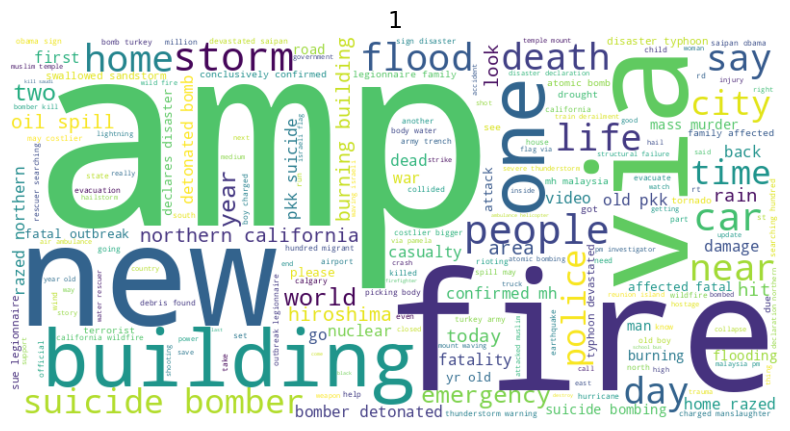

Word Cloud for Non Disaster related tweets (Negative class)


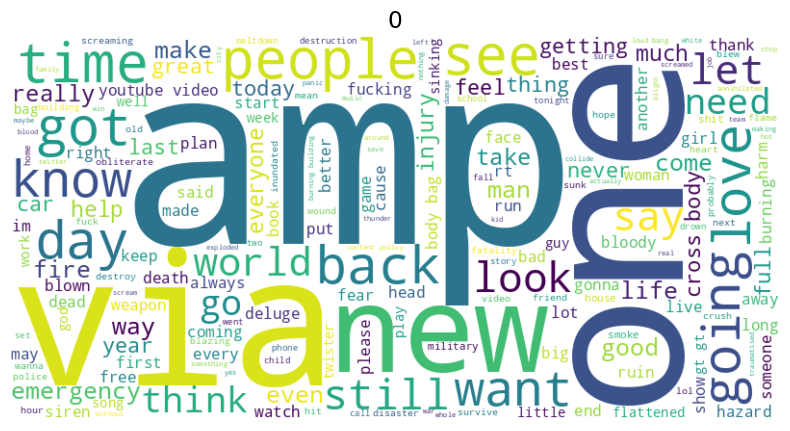

In [ ]:
# iterate over the label_texts dictionary and generate word clouds for each class
for label, text in label_texts.items():
    wordcloud = WordCloud(background_color='white', width=800, height=400).generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(label)
    print("Word Cloud for Disaster related tweets (Positive class)") if label == 1 else print("Word Cloud for Non Disaster related tweets (Negative class)")
    plt.show()

### Findings
From analyzing the Word clouds, we see a lot of disaster related vocabulary such as fire, flood, burn, killed, etc. in disaster related tweets which is very different and opposite from vocab found in the word cloud of non-disaster class such as love, good, greak, etc.

### 3.2.4 Analyzing most common stop words in the text data

By analyzing the frequency of stop words in disaster and non-disaster tweets, we can observe patterns and differences in language usage.

For example, if we find that certain stop words are more frequent in disaster tweets compared to non-disaster tweets, it may indicate that these stop words are commonly used in tweets related to disasters. This could suggest that tweets containing these stop words are more likely to be about real disasters.

On the other hand, if we find that certain stop words are more frequent in non-disaster tweets, it may indicate that these stop words are commonly used in tweets that are not related to disasters. This could suggest that tweets containing these stop words are more likely to be about non-disastrous events or general topics.

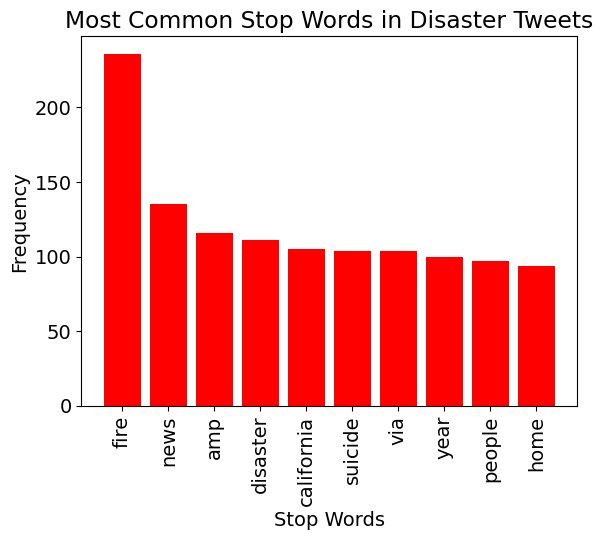

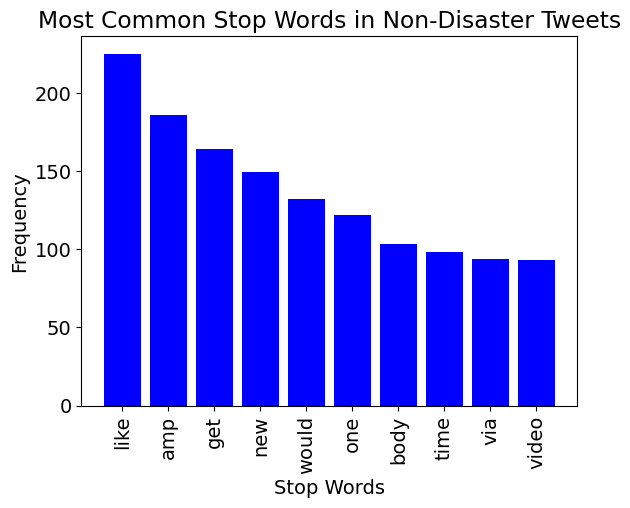

In [ ]:
#Initilizating Lemmatizer
lemmatizer = WordNetLemmatizer()
# Get the stop words
stop_words = set(stopwords.words("english"))

# Function to get stop words frequency
def get_stopword_frequency(text):
    stopword_frequency = Counter()
    for tweet in text:
        words = tweet.split()
        words = [word.lower() for word in words]
        stopword_frequency.update(words)
    return stopword_frequency

# Get stop word frequency in the disaster tweets
disaster_tweets = X_train[y_train == 1]
disaster_stopword_frequency = get_stopword_frequency(disaster_tweets)

# Extract most common stop words in disaster tweets and their frequencies
most_common_disaster_stopwords = disaster_stopword_frequency.most_common(10)
disaster_stop_words, disaster_frequencies = zip(*most_common_disaster_stopwords)

# Create a bar graph for the most common stop words in disaster tweets with red bars
plt.bar(disaster_stop_words, disaster_frequencies, color='red')
plt.xlabel("Stop Words")
plt.ylabel("Frequency")
plt.title("Most Common Stop Words in Disaster Tweets")
plt.xticks(rotation=90)
plt.show()

# Add space between the two bar graphs
plt.figure()

# Get stop word frequency in the non-disaster tweets
non_disaster_tweets = X_train[y_train == 0]
non_disaster_stopword_frequency = get_stopword_frequency(non_disaster_tweets)

# Extract most common stop words in non-disaster tweets and their frequencies
most_common_non_disaster_stopwords = non_disaster_stopword_frequency.most_common(10)
non_disaster_stop_words, non_disaster_frequencies = zip(*most_common_non_disaster_stopwords)

# Create a bar graph for the most common stop words in non-disaster tweets with blue bars
plt.bar(non_disaster_stop_words, non_disaster_frequencies, color='blue')
plt.xlabel("Stop Words")
plt.ylabel("Frequency")
plt.title("Most Common Stop Words in Non-Disaster Tweets")
plt.xticks(rotation=90)
plt.show()


### Findings
From analyzing the most common stop words, we came to know that if certain text is ending with fire, news, disaster, suicide, etc. then there is high probability that it can be taken as disaster tweets while text ending with like, get, new, etc. can be taken as non disasterous tweets.

## 4. Baseline Model

The code defines a simple baseline model that predicts all tweets as disasters (positive class).

Finally, it makes predictions on the validation set and calculates the validation accuracy, which is the proportion of correct predictions in the validation set. This baseline  model serves as a starting point for comparison with other more sophisticated machine learning models that will be developed later in the project.

The F1 score, training accuracy, and validation accuracy are important metrics for evaluating the performance of the model and determining whether more advanced models are needed to achieve better results.

In [ ]:
# Defining a simple baseline model that predicts all tweets as disasters (class 1)
def baseline_model(X):
    return np.ones(len(X))

# Making predictions on the test set
y_pred = baseline_model(X_val)

# Calculating F1 score for the baseline model
f1 = f1_score(y_val, y_pred)
print("F1 Score: ", f1)

# Making predictions on the training set
y_train_pred = baseline_model(X_train)

# Calculating training accuracy for the baseline model
train_acc = sum(y_train == y_train_pred) / len(y_train)
print("Training accuracy:", train_acc)

# Making predictions on the validation set
y_val_pred = baseline_model(X_val)

# Calculating validation accuracy for the baseline model
val_acc = sum(y_val == y_val_pred) / len(y_val)
print("Validation accuracy:", val_acc)


F1 Score:  0.6120218579234972
Training accuracy: 0.4284046124653335
Validation accuracy: 0.4409448818897638


## 5. Data Preprocessing

### 5.1 Tokenizer
The Tokenizer is a tool used for converting text data into numerical representations that can be used as input for machine learning models. In this code, we are using the Tokenizer class to fit on the training data, which allows it to learn the vocabulary and create a mapping between words and their corresponding integer values.

We then define a function called pad_data that takes sequences (i.e., text data) and pads them to a specified maximum length using the encoded values obtained from the Tokenizer. This is done to ensure that all the sequences have the same length, which is required for input to many machine learning models.

Finally, we use the pad_data function to pad both the training and validation data with a maximum length of 40, and print the padded training data.

In [ ]:
#Constructing Tokenizer class
t = Tokenizer() #Tokenizer class constructor for training documents

#Fitting Tokenizer to the train datan
t.fit_on_texts(X_train)

def pad_data(sequences, max_length):

  # Integer encode the documents
  encoded_docs = t.texts_to_sequences(sequences)
  # Pad documents to a max length of 40 words)
  padded_data = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
  return padded_data

X_train_padded = pad_data(X_train, 40)
X_val_padded = pad_data(X_val, 40)
print(X_train_padded)

[[ 5492  1986   910 ...     0     0     0]
 [ 1987  1988   859 ...     0     0     0]
 [ 5494  1398    42 ...     0     0     0]
 ...
 [13941 13942  1698 ...     0     0     0]
 [  183    23   418 ...     0     0     0]
 [ 1644  1529  1090 ...     0     0     0]]


In [ ]:
# Calculate the vocabulary size, which is the length of word_index plus 1
# The additional 1 is for reserving an integer value for out-of-vocabulary words
vocab_size = len(t.word_index) + 1
print("The training set vocab size is "+ str(vocab_size))

The training set vocab size is 13946


### 5.2 Reduced Vocabulary
We also want to be able to limit the vocabulary size. Since our padding function produces fixed-length sequences in a numpy matrix, we can use clever numpy indexing to efficiently replace all token ids larger than some value with the designated out-of-vocabulary (OOV) id.

In the code below, as an example, we'll keep just token ids less than 2000, replacing all others with OOV.

In [ ]:
max_token_id = 2000
def limit_vocab(sequences, max_token_id, oov_id=2):
  """Replace token ids greater than or equal to max_token_id with the oov_id."""
  reduced_sequences = np.copy(sequences)
  reduced_sequences[reduced_sequences >= max_token_id] = oov_id
  return reduced_sequences

# Reduce vocabulary to 2000 tokens.
X_train_reduced = limit_vocab(X_train_padded, max_token_id=max_token_id)
X_val_reduced = limit_vocab(X_val_padded, max_token_id=max_token_id)
print(X_train_reduced[0])
print(X_val_reduced[0])

[   2 1986  910    2  768    5    2    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]
[   6   70  123 1909  340    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]


### 5.3 One hot encoding

Our current feature representations are sparse. That is, we only keep track of the token ids that are present in the input. A one-hot encoding replaces a value like 70 (corresponding to 'weapon') with an array with a single 1 at position 70 and zeros everywhere else. This will be very memory-inefficient, but we'll do it anyway for clarity.

As discussed above, let's dramatically reduce both the number of token positions (review length) and the number of token ids (vocabulary). We'll clip each review after 40 tokens (so 140 -> 40) and keep only the most common 2000 tokens (so 14000 -> 2000).

In [ ]:
X_train_one_hot = tf.keras.utils.to_categorical(X_train_reduced)
X_val_one_hot = tf.keras.utils.to_categorical(X_val_reduced)
print('X_train_one_hot shape:', X_train_one_hot.shape)
print('X_val_one_hot shape:', X_val_one_hot.shape)

X_train_one_hot shape: (6851, 40, 2000)
X_val_one_hot shape: (762, 40, 2000)


## 6. Training and Tuning Deep Learning Models

### 6.1 Logistic Regression with One-Hot Encodings
Let's start with something familiar -- logistic regression. Since our feature representation is in 2 dimensions (40 x 2000), we need to flatten it to pass it to Keras.

Flatten by *concatenating* (as we did with pixels), turning (40 x 2000) data into (80000,) data. The result is a separate feature for each token at each position.



In [ ]:
def build_onehot_model(input_shape):
  """Build a tf.keras model for one-hot data."""
  # Clear session and remove randomness.
  tf.keras.backend.clear_session()
  tf.keras.utils.set_random_seed(0)

  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.InputLayer(input_shape=input_shape))
  model.add(tf.keras.layers.Dense(
      units=1,                     # output dim (for binary classification)
      activation="sigmoid"         # sigmoid activation for classification
  ))

  model.compile(loss='binary_crossentropy',   # this is a classification task
                optimizer='adam',             # fancy optimizer
                metrics=['accuracy'])

  return model

In [ ]:
print(X_val_reduced.shape)
def plot_history(history):
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.xticks(range(0, len(history['loss'] + 1)))
  plt.plot(history['loss'], label="training", marker='o')
  plt.plot(history['val_loss'], label="validation", marker='o')
  plt.legend()
  plt.show()

(762, 40)


Epoch 1/16
108/108 [==============================] - 3s 20ms/step - loss: 0.6685 - accuracy: 0.5843 - val_loss: 0.6546 - val_accuracy: 0.6155
Epoch 2/16
108/108 [==============================] - 1s 9ms/step - loss: 0.6290 - accuracy: 0.6589 - val_loss: 0.6345 - val_accuracy: 0.6417
Epoch 3/16
108/108 [==============================] - 1s 8ms/step - loss: 0.5966 - accuracy: 0.7339 - val_loss: 0.6181 - val_accuracy: 0.6772
Epoch 4/16
108/108 [==============================] - 1s 9ms/step - loss: 0.5695 - accuracy: 0.7638 - val_loss: 0.6036 - val_accuracy: 0.7192
Epoch 5/16
108/108 [==============================] - 1s 9ms/step - loss: 0.5442 - accuracy: 0.7935 - val_loss: 0.5922 - val_accuracy: 0.7297
Epoch 6/16
108/108 [==============================] - 1s 9ms/step - loss: 0.5229 - accuracy: 0.8111 - val_loss: 0.5832 - val_accuracy: 0.7297
Epoch 7/16
108/108 [==============================] - 1s 8ms/step - loss: 0.5027 - accuracy: 0.8288 - val_loss: 0.5748 - val_accuracy: 0.7362
Epoch

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 80000)             0         
                                                                 
 input_1 (InputLayer)        multiple                  0         
                                                                 
 dense (Dense)               (None, 1)                 80001     
                                                                 
Total params: 80,001
Trainable params: 80,001
Non-trainable params: 0
_________________________________________________________________


None

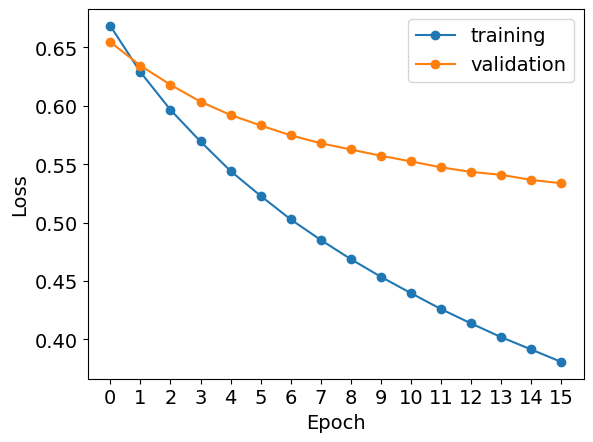

In [ ]:
input_shape = X_val_reduced.shape[1:]  # Update with the shape of your input data
lr_model = build_onehot_model(input_shape)
  # Display the model layers.

# Fit the model.
history = lr_model.fit(
  x = X_train_one_hot,  # one-hot training data
  y = y_train,          # corresponding binary labels
  epochs=16,             # number of passes through the training data
  batch_size=64,        # mini-batch size
  validation_data=(X_val_one_hot, y_val), # use a fraction of the examples for validation
  verbose=1             # display some progress output during training
  )
display(lr_model.layers)
display(lr_model.summary())

# Convert the return value into a DataFrame so we can see the train loss
# and binary accuracy after every epoch.
history = pd.DataFrame(history.history)
plot_history(history)

In [ ]:
y_val_prob = lr_model.predict(X_val_one_hot)
y_val_pred = (y_val_prob > 0.5).astype(int)
# Compute the F1 score.
f1 = f1_score(y_val, y_val_pred)
print(f"F1 score: {f1:.4f}")

24/24 [==============================] - 0s 4ms/step
F1 score: 0.6895


### 6.2 Logistic Regression with Embeddings
Here the code is a function that builds a logistic regression model with embeddings using TensorFlow Keras.

The model includes an embedding layer that maps input tokens to dense vectors, followed by optional global average pooling or flattening layers. The output is a trained logistic regression model that can be used for binary classification tasks, with binary cross-entropy loss, Adam optimizer, and accuracy metric for evaluation.

Next, let's train model that replaces one-hot representations of each token with learned embeddings.

The code below uses a Keras Embedding layer, which expects to receive a sparse (rather than one-hot) representation. That is, it expects a (padded) sequence of token ids; for each id, it looks up the corresponding embedding vector.

In [ ]:
def build_embeddings_model(vocab_size=2000,
                           sequence_length=40,
                           embedding_dim=8):
  """Build a tf.keras model using embeddings."""
  # Clear session and remove randomness.
  tf.keras.backend.clear_session()
  tf.keras.utils.set_random_seed(0)

  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Embedding(
      input_dim=vocab_size,
      output_dim=embedding_dim,
      input_length=sequence_length)
  )
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(
      units=1,                     # output dim (for binary classification)
      activation='sigmoid'         # apply the sigmoid function!
  ))

  model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

  return model

Epoch 1/4
108/108 [==============================] - 1s 3ms/step - loss: 0.6721 - accuracy: 0.5771 - val_loss: 0.6575 - val_accuracy: 0.6010
Epoch 2/4
108/108 [==============================] - 0s 2ms/step - loss: 0.6138 - accuracy: 0.6835 - val_loss: 0.5854 - val_accuracy: 0.7165
Epoch 3/4
108/108 [==============================] - 0s 2ms/step - loss: 0.5250 - accuracy: 0.7768 - val_loss: 0.5199 - val_accuracy: 0.7625
Epoch 4/4
108/108 [==============================] - 0s 2ms/step - loss: 0.4527 - accuracy: 0.8135 - val_loss: 0.4843 - val_accuracy: 0.8031


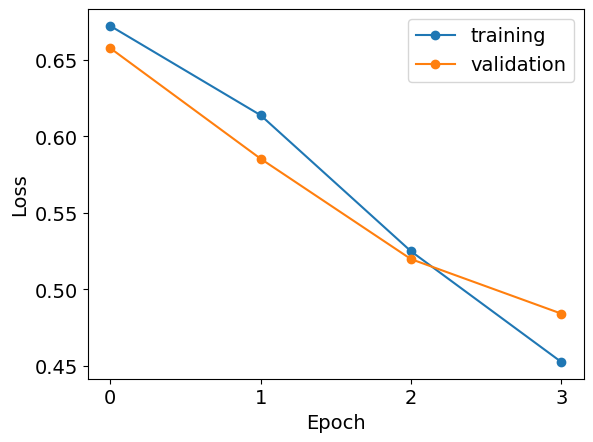

In [ ]:
lre_model = build_embeddings_model(vocab_size=2000,
                               sequence_length=40,
                               embedding_dim=8)
history = lre_model.fit(
  x = X_train_reduced,  # our sparse padded training data
  y = y_train,          # corresponding binary labels
  epochs=4,             # number of passes through the training data
  batch_size=64,        # mini-batch size
  validation_data=(X_val_reduced, y_val), # use a fraction of the examples for validation
  verbose=1             # display some progress output during training
  )

history = pd.DataFrame(history.history)
plot_history(history)

In [ ]:
print(X_val_reduced.shape)
y_val_prob = lre_model.predict(X_val_reduced)
y_val_pred = (y_val_prob > 0.5).astype(int)
# Compute the F1 score.
f1 = f1_score(y_val, y_val_pred)
print(f"F1 score: {f1:.4f}")

(762, 40)
24/24 [==============================] - 0s 1ms/step
F1 score: 0.7432


### 6.3 Convolutional Neural Network (CNN)


We will use the [Keras Functional API](https://keras.io/guides/functional_api/) so that we can concatenate the output of 3 separate Conv1D layers (which cannot be done with the Sequential API).

The provided code implements a Convolutional Neural Network (CNN) model for text classification. The CNN model takes in text data as input, processes it through multiple convolutional layers with different kernel sizes, and learns to classify it into binary labels. The build_cnn_model function defines the architecture of the CNN model, which includes an embedding layer for word embeddings, Conv1D layers for convolutional operations, dropout regularization to prevent overfitting, max pooling to reduce spatial dimensions, a flatten layer to flatten the tensor, and a dense output layer with sigmoid activation for binary classification.

The model is compiled with binary cross-entropy loss and Adam optimizer, and then trained on the training data with batch training and validation using a fraction of the examples. The training progress is displayed, and the training history is stored for further analysis. Overall, this CNN model can be used for text classification tasks where local patterns in the input text are important for making accurate predictions.

In [ ]:
def build_cnn_model(vocab_size=2000,
                    sequence_length=40,
                    embedding_dim=8):
    # Define the input layer with the given sequence length
    x = tf.keras.Input(shape=(sequence_length))

    # Add an embedding layer to learn word embeddings
    emb = tf.keras.layers.Embedding(input_dim=vocab_size,
                                    output_dim=embedding_dim,
                                    input_length=sequence_length)(x)

    # Add three Conv1D layers with different kernel sizes, filters, padding, and activation functions
    c1 = tf.keras.layers.Conv1D(
        filters=64, kernel_size=3, padding='same', activation='relu')(emb)

    c2 = tf.keras.layers.Conv1D(
        filters=64, kernel_size=4, padding='same', activation='relu')(emb)

    c3 = tf.keras.layers.Conv1D(
        filters=64, kernel_size=4, padding='same', activation='relu')(emb)

    # Concatenate the output of the Conv1D layers
    y = tf.keras.layers.Concatenate()([c1, c2, c3])

    # Add a dropout layer for regularization
    y = tf.keras.layers.Dropout(rate=0.05)(y)

    # Add a max pooling layer to reduce spatial dimensions
    y = tf.keras.layers.MaxPool1D(pool_size=sequence_length)(y)

    # Flatten the tensor
    y = tf.keras.layers.Flatten()(y)

    # Add a dense output layer with sigmoid activation for binary classification
    y = tf.keras.layers.Dense(units=1, activation='sigmoid')(y)

    # Create a model with the defined inputs, outputs, and name
    model = tf.keras.Model(inputs=x, outputs=y, name='imdb_cnn')

    # Compile the model with binary cross-entropy loss and Adam optimizer
    model.compile(loss='binary_crossentropy', optimizer='adam',
                  metrics=['accuracy'])

    # Return the built model
    return model


In [ ]:
cnn_model = build_cnn_model(
    vocab_size=2000, sequence_length=40, embedding_dim=8)

Epoch 1/2
215/215 [==============================] - 3s 11ms/step - loss: 0.6027 - accuracy: 0.6755 - val_loss: 0.4909 - val_accuracy: 0.7795
Epoch 2/2
215/215 [==============================] - 2s 8ms/step - loss: 0.4043 - accuracy: 0.8208 - val_loss: 0.4768 - val_accuracy: 0.7913


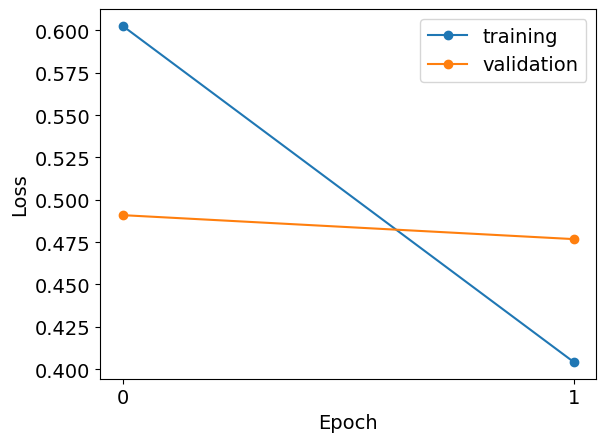

In [ ]:
# Clear session and remove randomness.
tf.keras.backend.clear_session()
tf.keras.utils.set_random_seed(0)

history = cnn_model.fit(
  x = X_train_reduced,
  y = y_train.reshape((-1,1)),          # corresponding binary labels
  epochs=2,             # number of passes through the training data
  batch_size=32,        # mini-batch size
  validation_data=(X_val_reduced, y_val), # use a fraction of the examples for validation
  verbose=1,            # display some progress output during training
)

history = pd.DataFrame(history.history)
plot_history(history)

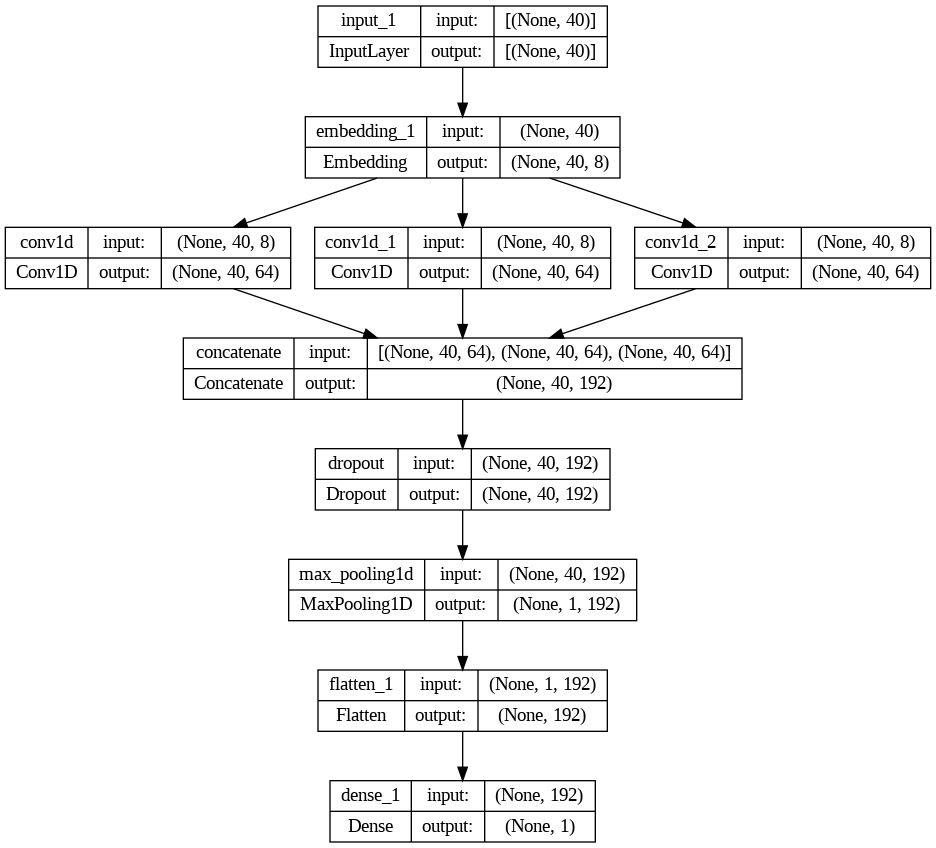

In [ ]:
tf.keras.utils.plot_model(cnn_model, show_shapes=True)

In [ ]:
y_val_prob = cnn_model.predict(X_val_reduced)
y_val_pred = (y_val_prob > 0.5).astype(int)
# Compute the F1 score.
f1 = f1_score(y_val, y_val_pred)
print(f"F1 score: {f1:.4f}")

24/24 [==============================] - 0s 2ms/step
F1 score: 0.7440


## 7. Model Analysis

### 7.1 Inspecting Confusion Matrix for Logistic Regression

Generating a confusion matrix, which is a visual representation of the performance of a logistic regression model on a validation dataset. The confusion matrix provides information about the number of true positive (TP), false positive (FP), true negative (TN), and false negative (FN) predictions made by the model.

The matrix is displayed as a heatmap, with cells annotated to show the counts of each type of prediction. This allows for a quick assessment of the model's accuracy, precision, recall, and other performance metrics, helping to evaluate the effectiveness of the logistic regression model in predicting the target variable.

24/24 [==============================] - 0s 4ms/step


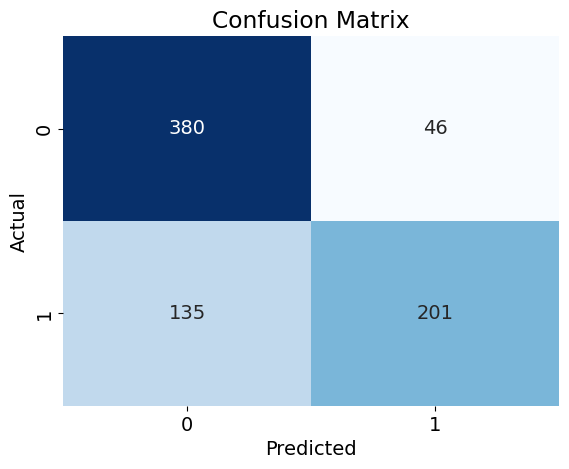

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the predicted labels for the validation data
y_val_prob = lr_model.predict(X_val_one_hot)
y_val_pred = (y_val_prob > 0.5).astype(int)

# Generate the confusion matrix
cm = confusion_matrix(y_val, y_val_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Calculate accuracy
accuracy = (cm[0][0] + cm[1][1]) / np.sum(cm)
print("Accuracy: " + str(accuracy))
# Calculate precision
precision = cm[1][1] / (cm[1][1] + cm[0][1])
print("Precision: " + str(precision))
# Calculate recall (sensitivity)
recall = cm[1][1] / (cm[1][1] + cm[1][0])
print("Recall: " + str(recall))
# Calculate F1 score
f1 = 2 * (precision * recall) / (precision + recall)
print("F1 Score: " + str(f1))

Accuracy: 0.7624671916010499
Precision: 0.8137651821862348
Recall: 0.5982142857142857
F1 Score: 0.6895368782161234


### Findings
In summary, based on the confusion matrix, our logistic regression model has a moderate level of precision, recall, and F1 score. It is able to correctly identify around 60% of the actual disastrous tweets, with an overall precision of around 81%. However, there are still some false positives and false negatives, indicating that there is room for improvement in the model's performance.

### Examination of some actual errors made by the model

Upon examination of the confusion matrix and performance metrics of our logistic regression model for tweet classification, we may identify some actual errors made by the model. These errors could include false positives (FP) where the model wrongly predicts tweets as disastrous when they are actually non-disastrous, and false negatives (FN) where the model incorrectly predicts tweets as non-disastrous when they are actually disastrous.








### Addressing some error pattern(s)

After analyzing the confusion matrix and performance metrics of our logistic regression model for classifying tweets as disastrous or non-disastrous, we may identify certain error patterns such as false positives (FP) and false negatives (FN).

We could address false positives (FP) and false negatives (FN) in the logistic regression model for tweet classification by considering different strategies. For false positives, we could potentially adjust the classification threshold or refine the features used in the model through feature engineering. By carefully selecting and engineering relevant features, we may improve the model's ability to correctly classify tweets as disastrous or non-disastrous.

Additionally, we could consider balancing the dataset if it is imbalanced to ensure equal representation of both classes during model training. Another approach could be to explore different algorithms or fine-tune hyperparameters to improve model performance. Collecting more data may also be beneficial in addressing false positives. Regularly evaluating the model's performance and iterating on improvements can help optimize its performance over time.








### 7.2 Inspecting Learned Embeddings

Let's retrieve the learned embedding parameters from the trained model and plot the token embeddings.

The model layers in a Keras Sequential model are stored as a list and the embeddings are the first layer. We can use the get_weights() function to get a numpy array with the parameters.

In [ ]:
# Display the model layers.
display(lre_model.layers)

# Retrieve the embeddings layer, which itself is wrapped in a list.
embeddings = lre_model.layers[0].get_weights()[0]
display(embeddings.shape)

(2000, 8)

Now we'll use a fancy plotting tool called *plotly* to show the embeddings with hovertext so you can move your mouse over the points to see the corresponding tokens.

In [ ]:
encoded_docs = t.texts_to_sequences(X_train)  #gives a list of integers (representing frequencies)

# Create a reverse index so we can lookup tokens assigned to each id.
reverse_index = dict(map(reversed, t.word_index.items()))

def plot_2d_embeddings(embeddings, id_start=1, count=100):
  # Get 1st and 2nd embedding dims for the desired tokens.
  x1 = embeddings[id_start:id_start+count, 0]
  x2 = embeddings[id_start:id_start+count, 1]

  # Get the corresponding words from the reverse index (for labeling).
  tokens = [reverse_index[i] for i in range(id_start, id_start+count)]

  # Plot with the plotly library.
  data = plotly.Scatter(x=x1, y=x2, text=tokens,
                        mode='markers', textposition='bottom left',
                        hoverinfo='text')
  fig = plotly.Figure(data=[data],
                      layout=plotly.Layout(title="Word Embeddings",
                                           hovermode='closest'))
  fig.show()

# Very frequent tokens tend to be more syntactic than semantic, so let's plot
# some rarer words.
plot_2d_embeddings(embeddings, id_start=500, count=500)

### Findings

The plot above shows that the learned embeddings have successfully separated disaster-related (positive) and non-disaster-related (negative) words. Words like "evacuated", "alarm", "feared", and "crisis" are strongly associated with disaster-related news, which is expected. However, words like "ablaze", "hellfire", and "aftershock" appear in the non-disaster-related section, which is surprising, as (in general) they should have a strong relation with disaster-related tweets.

### Addressing some error patterns

One potential approach to improve the model's performance based on this analysis is to remove these misclassified words from the vocabulary. However, this could lead to a loss of information and reduced accuracy. Instead, a more effective strategy would be to augment the training data with more examples that contain these misclassified words. This will help the model learn how to better differentiate between disaster and non-disaster-related tweets, leading to an overall improvement in accuracy.

## 8. Results

|Model|Traning Accuracy|Validation Accuracy|F1 Score|Kaggle Score
|-|-|-|-|-|
|Baseline| 0.4284|0.4409|0.6120|0.4296
|Logisitic Regression (LR)|0.8974|0.7625|0.6895|0.7536
|LR with embeddings|0.8135|0.8031|0.7432|0.7827
|Convolutional Neural Network(CNN)|0.8208|0.7913|0.7440|0.7977




## 9. Conclusion

Based on the results of the experiment, we can see that the baseline model had the lowest accuracy and F1 score, indicating that it was not effective in predicting whether a tweet is related to a disaster or not.

The logistic regression model improved significantly in both training and validation accuracy, with an F1 score of 0.6895. However, the LR with embeddings and CNN models performed even better, with higher F1 scores and Kaggle submission scores.

Overall, it can be concluded that using machine learning algorithms such as logistic regression, and more advanced techniques such as embeddings and CNNs can significantly improve the accuracy and performance of disaster tweet classification.